In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Open the CVS file
gdp = pd.read_csv("us_gdp.csv")

# Print first rows
gdp.head()


,Year,GDP Nominal (Current USD),GDP Real (Inflation adj.),GDP Change,GDP per capita,Pop. Change,Population
0,2023,"$27,720,700,000,000","$22,062,600,000,000",2.89%,"$64,233",0.57%,343477335
1,2022,"$26,006,900,000,000","$21,443,400,000,000",2.51%,"$62,786",0.4%,341534046
2,2021,"$23,681,200,000,000","$20,917,900,000,000",6.05%,"$61,494",0.21%,340161441
3,2020,"$21,354,100,000,000","$19,723,600,000,000",-2.16%,"$58,107",0.49%,339436159
4,2019,"$21,540,000,000,000","$20,159,600,000,000",2.58%,"$59,681",0.82%,337790067


In [3]:
# Remove the $ and %
gdp = gdp.apply(
    lambda s: (s.astype(str)
                 .str.replace(r'[\$,%]', '', regex=True)
                 .str.replace(',', '', regex=False)
                 .str.strip())
)

In [4]:
# Transform values to numbers
gdp = gdp.apply(pd.to_numeric, errors='coerce')

In [5]:
gdp.describe()

,Year,GDP Nominal (Current USD),GDP Real (Inflation adj.),GDP Change,GDP per capita,Pop. Change,Population
count,31.000000,3.100000e+01,3.100000e+01,31.000000,31.000000,31.000000,3.100000e+01
mean,2008.000000,1.490986e+13,1.606106e+13,2.560968,52176.387097,0.907742,3.048661e+08
std,9.092121,5.627737e+12,3.254408e+12,1.766398,6413.750851,0.207070,2.583688e+07
min,1993.000000,6.858560e+12,1.039740e+13,-2.580000,39589.000000,0.210000,2.626332e+08
25%,2000.500000,1.041645e+13,1.378325e+13,2.060000,48724.000000,0.935000,2.828819e+08
50%,2008.000000,1.447810e+13,1.631250e+13,2.700000,52832.000000,0.970000,3.049703e+08
75%,2015.500000,1.854995e+13,1.846145e+13,3.625000,56343.500000,0.995000,3.276530e+08
max,2023.000000,2.772070e+13,2.206260e+13,6.050000,64233.000000,1.170000,3.434773e+08


In [6]:
gdp = gdp.rename(columns={"GDP Nominal (Current USD)":"GDP Nominal [$]", 
"GDP Real (Inflation adj.)":"GDP Inflation Adjusted [$]", 
"GDP Change":"GDP Change [%]", 
"GDP per capita":"GDP per capita [$]", 
"Pop. Change":"Pop. Change[%]"}
)

In [7]:
gdp.head()

,Year,GDP Nominal [$],GDP Inflation Adjusted [$],GDP Change [%],GDP per capita [$],Pop. Change[%],Population
0,2023,27720700000000,22062600000000,2.89,64233,0.57,343477335
1,2022,26006900000000,21443400000000,2.51,62786,0.40,341534046
2,2021,23681200000000,20917900000000,6.05,61494,0.21,340161441
3,2020,21354100000000,19723600000000,-2.16,58107,0.49,339436159
4,2019,21540000000000,20159600000000,2.58,59681,0.82,337790067


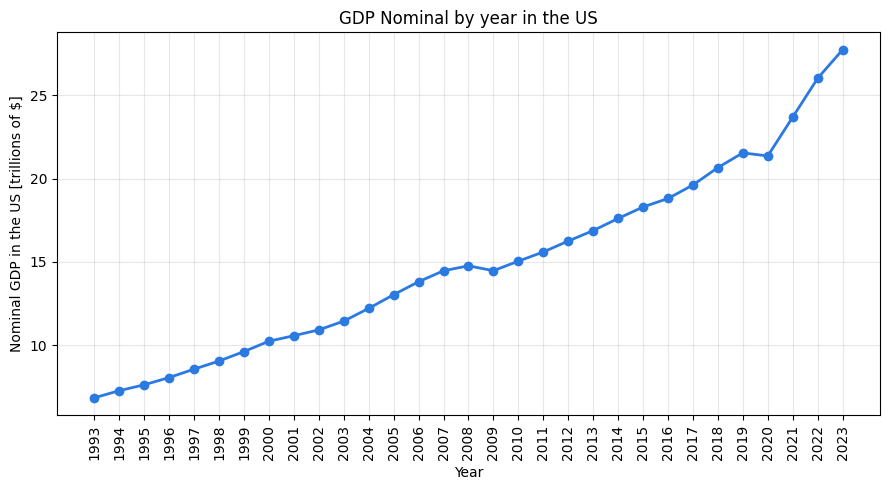

In [8]:
# Select columns and sort values by year
gdp_plot = (gdp[["Year", "GDP Nominal [$]"]]
           .sort_values("Year"))

# plot in trillions for readable axis
gdp_trillions = gdp_plot["GDP Nominal [$]"] / 1e12

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(gdp_plot["Year"], gdp_trillions, marker="o", linewidth=2, color="#2a7ae2")

# Set title and labels
ax.set_title("GDP Nominal by year in the US")
ax.set_xlabel("Year")
ax.set_ylabel("Nominal GDP in the US [trillions of $]")
ax.grid(True, alpha=0.3)

ax.set_xticks(gdp_plot["Year"])  
plt.xticks(rotation=90) # Rotate 90° x values for readability

# Show layout and plot
plt.tight_layout()
plt.show()

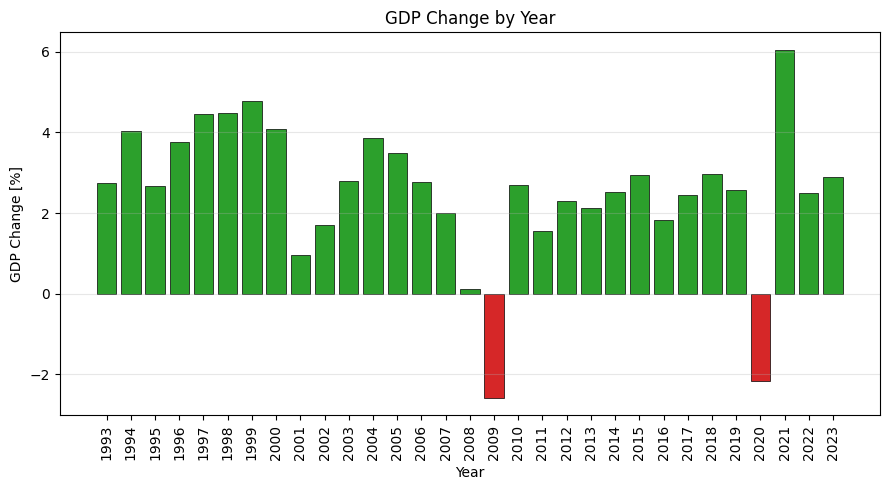

In [10]:
# Prepare data
df = gdp[['Year', 'GDP Change [%]']].sort_values('Year').copy()
x = df['Year']
y = df['GDP Change [%]']

# If stored as fractions (0–1), convert to percent
if y.max() <= 1:
    y = y * 100

# Set color negatives red and positives green
colors = ['#2ca02c' if v >= 0 else '#d62728' for v in y]

# Plot bar chart
fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(x, y, color=colors, edgecolor='black', linewidth=0.5)

# Define labels
ax.set_title('GDP Change by Year')
ax.set_xlabel('Year')
ax.set_ylabel('GDP Change [%]')
ax.set_xticks(x)
plt.xticks(rotation=90) # Rotate 90° x values for readability
ax.grid(axis='y', alpha=0.3)

# Plot layout and show chart
plt.tight_layout()
plt.show()